# Parte 1: Numpy:
Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

### Problema 1

¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [49]:
import sys
size_of_boolean = sys.getsizeof(True) * 1000
print("El tamaño si todos son True {}".format(size_of_boolean))
size_of_boolean = sys.getsizeof(False) * 1000
print("El tamaño si todos son False {}".format(size_of_boolean)) 


El tamaño si todos son True 28000
El tamaño si todos son False 24000


### Problema 2

Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [50]:
list_of_evens = range(100, 1, -2)

for number in range(10) :
    print(list_of_evens[number])

100
98
96
94
92
90
88
86
84
82


### Problema 3

Dado el array
```
2 4 5 6 
0 3 7 4 
8 8 5 2 
1 5 6 1
```

- Seleccione con una instrucción el subarray de elementos 
```
0 3 7 4
```

- Después, seleccione el subarray de elementos

```
2 5 
8 5
```

In [51]:
array = [[2, 4, 5, 6],[0, 3, 7, 4],[8, 8, 5, 2],[1, 5, 6, 1]]
print(f"subarray 0 3 7 4: {array[1]}")


sub_array = []

for x in range(0, len(array), 2):
    row = []
    for y in range(0, len(array[x]), 2):
        row.append(array[x][y])
    sub_array.append(row)

print(f"subarray :\n 2 5 \n 8 5 \n {sub_array}")


subarray 0 3 7 4: [0, 3, 7, 4]
subarray :
 2 5 
 8 5 
 [[2, 5], [8, 5]]


### Problema 4

Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [52]:
a = [1, 4, 2, 7]
b = [1, 3, 2, 9]

sum_ = 0
for x in range(len(a)) :
    diff = a[x] - b[x]
    sum_ += diff

print(f"Media: {sum_ / len(a)}")

Media: -0.25


### Problema 5

Tengo valores de cordenadas (x, y) en las columnas del array

```
1.33 4.5
30.0 10.7
70.2 0.5
```

- Agregue a este array las coordenadas (37.1, -3.6).

- Muestre en pantalla las dimensiones del nuevo array.

In [53]:
points = [(1.33, 4.5),(30.0, 10.7), (70.2, 0.5)]
print(points)

new_point = (37.1, -3.6)
points.append(new_point)

print(points)

[(1.33, 4.5), (30.0, 10.7), (70.2, 0.5)]
[(1.33, 4.5), (30.0, 10.7), (70.2, 0.5), (37.1, -3.6)]


### Problema 6

Copie el array del ejercicio anterior. Traspóngalo.
 
 - Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [54]:
import numpy as np 

points.append((10.8, 3.0))
points.append((35.8, 12.0))

T = np.transpose(points)
print(T)


[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


--- 

## Parte 2: Exploración y Minería de Datos:
Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

### Problema 1

¿Cuántos Municipios tienen más de 100000 habitantes?.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./NucleosPoblacion.csv")
municipalities_with_more_100000 = data[data['Poblacion'] > 100000] 

municipalities_with_more_100000['Municipio']

9      Las Palmas de Gran Canaria
16                          Telde
28     San Cristóbal de La Laguna
40         Santa Cruz de Tenerife
42                        Badajoz
                  ...            
683      Santa Coloma de Gramenet
689                      Terrassa
725                        Lleida
735                          Reus
737                     Tarragona
Name: Municipio, Length: 62, dtype: object

### Problema 2

Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:

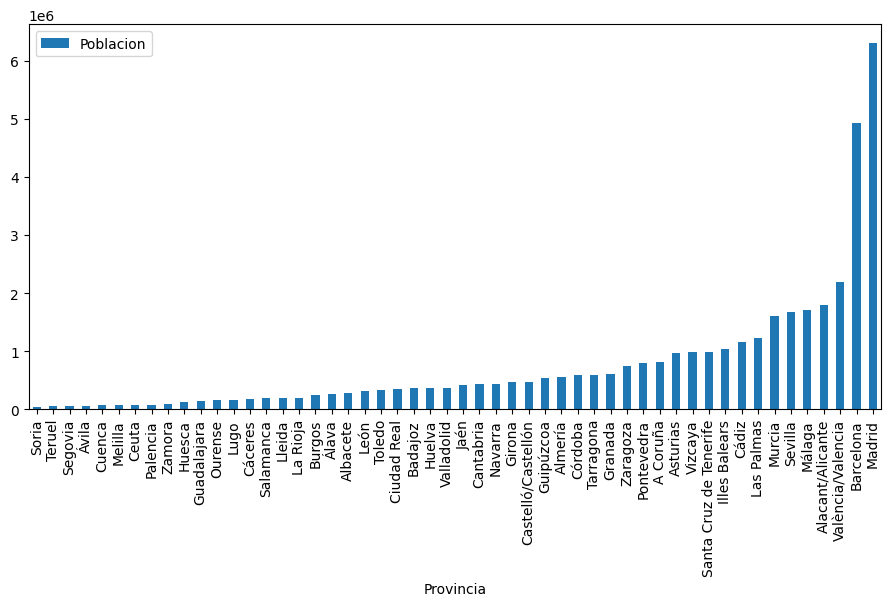

In [196]:
dataset = data[["Provincia", "Poblacion"]]

dataset = data.groupby(["Provincia"],  as_index=False).sum()

dataset = dataset[["Poblacion", 'Provincia']].sort_values(by='Poblacion', ascending=True)

ax = dataset.plot.bar(x='Provincia', y='Poblacion', rot=90, figsize=(11, 5))





-  ¿Cuál es la segunda ciudad más poblada?


In [57]:
data_sorted = data.sort_values(by='Poblacion', ascending=False)
data_sorted.iloc[1]['Municipio']

'Barcelona'

¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [58]:
granada_data = data_sorted[data_sorted['Municipio'] == 'Granada']
granada_data

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
272,272,273,Granada,239154.0,18087,Granada,18,Granada,-3.600019,37.176419


### Problema 3

¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [59]:
extremadura_data = data[data['Provincia'] == 'Extremadura']
print(extremadura_data)

print("No data with Extremadura")

Empty DataFrame
Columns: [FID, OBJECTID, Texto, Poblacion, CodMun, Municipio, CodProvin, Provincia, X, Y]
Index: []
No data with Extremadura


### Problema 4

¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [60]:
data_sorted_by_Y = data.sort_values(by='Y', ascending=False)
head_Y = data_sorted_by_Y.iloc[0]

print(f"Municipio: {head_Y['Municipio']}")
print(f"Provincia: {head_Y['Provincia']}")
print(f"Poblacion: {head_Y['Poblacion']}")


Municipio: Viveiro
Provincia: Lugo
Poblacion: 16211.0


### Problema 5

Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [61]:
granada_data = data[data['Provincia'] == 'Granada']
granada_people = granada_data['Poblacion']
print(f"Media: {granada_people.mean()}")
print(f"Mediana {granada_people.median()}")
print(f"Desviacion Estandar {granada_people.std()}")
print(f"Maximo {granada_people.max()}")
print(f"Minimo {granada_people.min()}")

Media: 30217.85
Mediana 17526.0
Desviacion Estandar 50355.49171459276
Maximo 239154.0
Minimo 10386.0


### Problema 6
Realice un histograma con la población de los Municipios para cada una de las provincias.

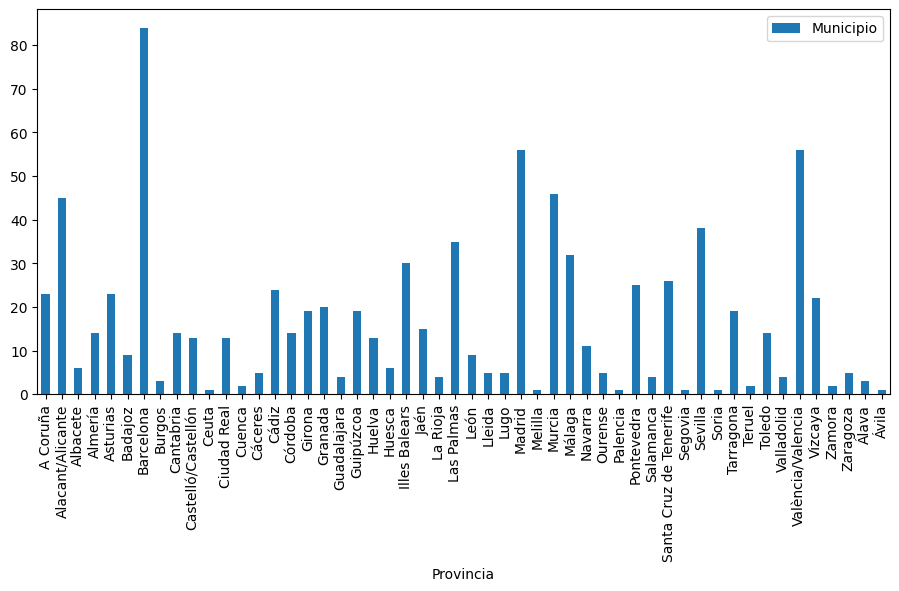

In [206]:
histogram_data = data[["Provincia", "Municipio"]]

histogram_data = histogram_data.groupby("Provincia", as_index=False).count()

ax = histogram_data.plot.bar(x='Provincia', y='Municipio', rot=90, figsize=(11, 5))

### Problema 7 

7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [62]:
dataset = data.sample(frac=1)
dataset = dataset[:50]

dataset_people = dataset["Poblacion"]

print(f"Media: {dataset_people.mean()}")
print(f"Desviacion Estandar: {dataset_people.std()}")


Media: 36580.76
Desviacion Estandar: 46006.95245799091



8. Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [216]:
madrid_row = data[data['Municipio'] == 'Madrid']

madrid_X = madrid_row.iloc[0]["X"]
madrid_Y = madrid_row.iloc[0]["Y"]


distances = ((data["X"] - madrid_X)**2 + (data["Y"] - madrid_Y)**2) ** 0.5

data["distance"] = distances

dataset = data[data['Municipio'] != 'Madrid']

dataset = dataset.sort_values(by='distance', ascending=True)


print("----------------------------------")
print("Municipios mas cercanas")
print("----------------------------------")
for municipality in dataset.head(10)["Municipio"]:
    print(municipality)


print("----------------------------------")
print("Municipios mas lejanos")
print("----------------------------------")
dataset = dataset.sort_values(by='distance', ascending=False)
for municipality in dataset.head(10)["Municipio"]:
    print(municipality)

----------------------------------
Municipios mas cercanas
----------------------------------
Pozuelo de Alarcón
Getafe
Leganés
Leganés
Pozuelo de Alarcón
Getafe
Coslada
Alcorcón
Alcobendas
San Sebastián de los Reyes
----------------------------------
Municipios mas lejanos
----------------------------------
Los Llanos de Aridane
Santa Cruz de la Palma
Arona
Adeje
Adeje
Arona
Guía de Isora
Santiago del Teide
San Miguel de Abona
Granadilla de Abona
